In [106]:
# Import the machine learning libraries.
import bs4 as bs
import urllib.request
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')
import heapq

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [107]:
# Install BeautifulSoup 4.
pip install beautifulsoup4

In [108]:
# Install lxml.
pip install lxml

In [0]:
# Get the data source from the Wikipedia.
source = urllib.request.urlopen('https://en.wikipedia.org/wiki/Global_warming').read()

In [0]:
# Parse the data and create BeautifulSoup object.
soup = bs.BeautifulSoup(source,'lxml')

In [111]:
soup.prettify()

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   Global warming - Wikipedia\n  </title>\n  <script>\n   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"Xp3udQpAAD8AABGaRcYAAADP","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Global_warming","wgTitle":"Global warming","wgCurRevisionId":952130253,"wgRevisionId":952130253,"wgArticleId":5042951,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: ref=harv","Webarchive template wayback links","Harv and Sfn template errors","Articles with short description","Wikipedia indefinitely move-

In [0]:
# Fetch the data.
text = ""
for paragraph in soup.find_all('p'):
    text += paragraph.text

In [113]:
print(text)


Global warming is the ongoing rise of the average temperature of the Earth's climate system and has been demonstrated by direct temperature measurements and by measurements of various effects of the warming.[1] It is a major aspect of climate change which, in addition to rising global surface temperatures,[2] also includes its effects, such as changes in precipitation.[3] While there have been prehistoric periods of global warming,[4] observed changes since the mid-20th century have been unprecedented in rate and scale.[5]
The Intergovernmental Panel on Climate Change (IPCC) concluded that, "human influence on climate has been the dominant cause of observed warming since the mid-20th century".[9] These findings have been recognized by the national science academies of major nations and are not disputed by any scientific body of national or international standing.[10] The largest human influence has been the emission of greenhouse gases, with over 90% of the impact from carbon dioxide 

In [0]:
# Preprocess the data.
text = re.sub(r'\[[0-9]*\]',' ',text)
text = re.sub(r'\s+',' ',text)
clean_text = text.lower()
clean_text = re.sub(r'\W',' ',clean_text)
clean_text = re.sub(r'\d',' ',clean_text)
clean_text = re.sub(r'\s+',' ',clean_text)

In [115]:
print(clean_text)

 global warming is the ongoing rise of the average temperature of the earth s climate system and has been demonstrated by direct temperature measurements and by measurements of various effects of the warming it is a major aspect of climate change which in addition to rising global surface temperatures also includes its effects such as changes in precipitation while there have been prehistoric periods of global warming observed changes since the mid th century have been unprecedented in rate and scale the intergovernmental panel on climate change ipcc concluded that human influence on climate has been the dominant cause of observed warming since the mid th century these findings have been recognized by the national science academies of major nations and are not disputed by any scientific body of national or international standing the largest human influence has been the emission of greenhouse gases with over of the impact from carbon dioxide and methane fossil fuel burning is the princi

<function matplotlib.pyplot.show>

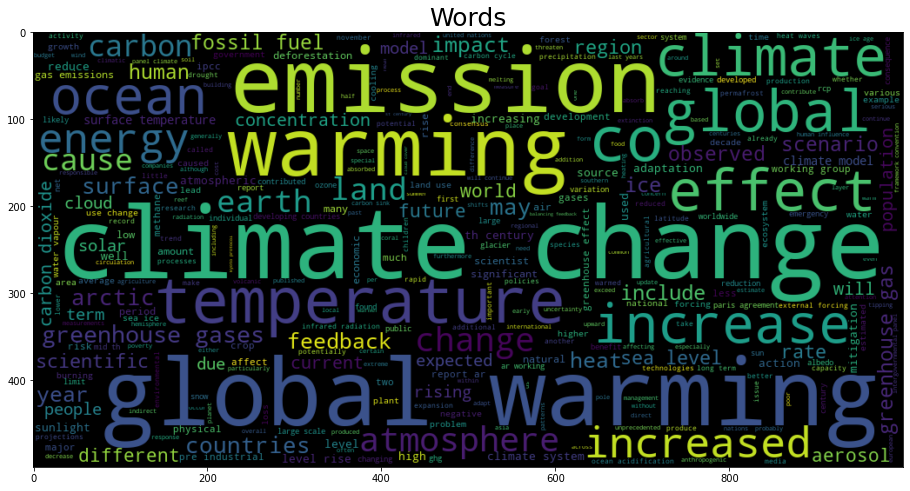

In [116]:
# Word cloud for the cleaned text.
plt.figure(figsize=(16,8))
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5)
wc_clean_text = WC.generate(clean_text)
plt.imshow(wc_clean_text, interpolation='bilinear')
plt.title('Words', fontsize=25)
plt.show

In [0]:
# Tokenize sentences.
sentences = nltk.sent_tokenize(text)

In [118]:
print(sentences)

[" Global warming is the ongoing rise of the average temperature of the Earth's climate system and has been demonstrated by direct temperature measurements and by measurements of various effects of the warming.", 'It is a major aspect of climate change which, in addition to rising global surface temperatures, also includes its effects, such as changes in precipitation.', 'While there have been prehistoric periods of global warming, observed changes since the mid-20th century have been unprecedented in rate and scale.', 'The Intergovernmental Panel on Climate Change (IPCC) concluded that, "human influence on climate has been the dominant cause of observed warming since the mid-20th century".', 'These findings have been recognized by the national science academies of major nations and are not disputed by any scientific body of national or international standing.', 'The largest human influence has been the emission of greenhouse gases, with over 90% of the impact from carbon dioxide and m

In [0]:
# Stopword list.
stop_words = nltk.corpus.stopwords.words('english')

In [0]:
# Word counts.
word2count = {}
for word in nltk.word_tokenize(clean_text):
    if word not in stop_words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [0]:
# Convert counts to weights.
max_count = max(word2count.values())
for key in word2count.keys():
    word2count[key] = word2count[key]/max_count

In [0]:
# Product sentence scores.
sent2score = {}
for sentence in sentences:
    for word in nltk.word_tokenize(sentence.lower()):
        if word in word2count.keys():
            if len(sentence.split(' ')) < 25:
                if sentence not in sent2score.keys():
                    sent2score[sentence] = word2count[word]
                else:
                    sent2score[sentence] += word2count[word]

In [0]:
# Get the optimal 3 lines.
n_sentences = 3
best_sentences = heapq.nlargest(n_sentences, sent2score, key=sent2score.get)

In [124]:
# Print 3 sentences.
for sentence in best_sentences:
    print(sentence, sep = "\n")

While aerosols typically limit global warming by reflecting sunlight, black carbon in soot that falls on snow or ice can contribute to global warming.
The long-term effects of global warming include further ice melt, ocean warming, sea level rise, and ocean acidification.
Countries work together on climate change under the umbrella of the United Nations Framework Convention on Climate Change (UNFCCC), which has near-universal membership.
